In [1]:
#installing geopandas
%pip install geopandas 

Note: you may need to restart the kernel to use updated packages.


In [4]:
#import libraries
import json
import json
import requests
import folium 
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from folium.features import GeoJsonTooltip
from folium import features

In [35]:
url = (r'C:\Users\Ramoraswi\Downloads\country_boundaries_v2.json')
geoJson = gpd.read_file(url)
geoJson

ERROR:fiona._env:PROJ: proj_create_from_database: C:\Program Files\PostgreSQL\14\share\contrib\postgis-3.2\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 0 whereas a number >= 2 is expected. It comes from another PROJ installation.


,SOVEREIGNT,TYPE,ADMIN,NAME,NAME_LONG,FORMAL_EN,POP_EST,POP_RANK,ECONOMY,INCOME_GRP,CONTINENT,SUBREGION,REGION_WB,LABEL_X,LABEL_Y,geometry
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,Oceania,Melanesia,East Asia & Pacific,177.975427,-17.826099,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,Africa,Eastern Africa,Sub-Saharan Africa,34.959183,-6.051866,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1..."
2,Western Sahara,Indeterminate,Western Sahara,W. Sahara,Western Sahara,Sahrawi Arab Democratic Republic,603253.0,11,7. Least developed region,5. Low income,Africa,Northern Africa,Middle East & North Africa,-12.630304,23.967592,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27..."
3,Canada,Sovereign country,Canada,Canada,Canada,Canada,37589262.0,15,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-101.910700,60.324287,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,Country,United States of America,United States of America,United States,United States of America,328239523.0,17,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-97.482602,39.538479,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Republic of Serbia,Sovereign country,Republic of Serbia,Serbia,Serbia,Republic of Serbia,6944975.0,13,6. Developing region,3. Upper middle income,Europe,Southern Europe,Europe & Central Asia,20.787989,44.189919,"MULTIPOLYGON (((18.82982 45.90887, 18.82984 45..."
173,Montenegro,Sovereign country,Montenegro,Montenegro,Montenegro,Montenegro,622137.0,11,6. Developing region,3. Upper middle income,Europe,Southern Europe,Europe & Central Asia,19.143727,42.803101,"MULTIPOLYGON (((20.07070 42.58863, 19.80161 42..."
174,Kosovo,Disputed,Kosovo,Kosovo,Kosovo,Republic of Kosovo,1794248.0,12,6. Developing region,4. Lower middle income,Europe,Southern Europe,Europe & Central Asia,20.860719,42.593587,"MULTIPOLYGON (((20.59025 41.85541, 20.52295 42..."
175,Trinidad and Tobago,Sovereign country,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,Republic of Trinidad and Tobago,1394973.0,12,6. Developing region,2. High income: nonOECD,North America,Caribbean,Latin America & Caribbean,-60.918400,10.998900,"MULTIPOLYGON (((-61.68000 10.76000, -61.10500 ..."


In [38]:
def population_class(population):
    if population['POP_EST'] >= 600000000:
        return '1. High'
    elif population['POP_EST'] >= 40000000 and population['POP_EST'] < 600000000:
        return '2. Average'
    elif population['POP_EST'] < 40000000:
        return '3. Low'


In [39]:
geoJson['population_class'] = geoJson.apply(lambda population: population_class(population), axis= 1)
geoJson

,SOVEREIGNT,TYPE,ADMIN,NAME,NAME_LONG,FORMAL_EN,POP_EST,POP_RANK,ECONOMY,INCOME_GRP,CONTINENT,SUBREGION,REGION_WB,LABEL_X,LABEL_Y,geometry,population_class
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,Oceania,Melanesia,East Asia & Pacific,177.975427,-17.826099,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3. Low
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,Africa,Eastern Africa,Sub-Saharan Africa,34.959183,-6.051866,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1...",2. Average
2,Western Sahara,Indeterminate,Western Sahara,W. Sahara,Western Sahara,Sahrawi Arab Democratic Republic,603253.0,11,7. Least developed region,5. Low income,Africa,Northern Africa,Middle East & North Africa,-12.630304,23.967592,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27...",3. Low
3,Canada,Sovereign country,Canada,Canada,Canada,Canada,37589262.0,15,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-101.910700,60.324287,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3. Low
4,United States of America,Country,United States of America,United States of America,United States,United States of America,328239523.0,17,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-97.482602,39.538479,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2. Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Republic of Serbia,Sovereign country,Republic of Serbia,Serbia,Serbia,Republic of Serbia,6944975.0,13,6. Developing region,3. Upper middle income,Europe,Southern Europe,Europe & Central Asia,20.787989,44.189919,"MULTIPOLYGON (((18.82982 45.90887, 18.82984 45...",3. Low
173,Montenegro,Sovereign country,Montenegro,Montenegro,Montenegro,Montenegro,622137.0,11,6. Developing region,3. Upper middle income,Europe,Southern Europe,Europe & Central Asia,19.143727,42.803101,"MULTIPOLYGON (((20.07070 42.58863, 19.80161 42...",3. Low
174,Kosovo,Disputed,Kosovo,Kosovo,Kosovo,Republic of Kosovo,1794248.0,12,6. Developing region,4. Lower middle income,Europe,Southern Europe,Europe & Central Asia,20.860719,42.593587,"MULTIPOLYGON (((20.59025 41.85541, 20.52295 42...",3. Low
175,Trinidad and Tobago,Sovereign country,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,Republic of Trinidad and Tobago,1394973.0,12,6. Developing region,2. High income: nonOECD,North America,Caribbean,Latin America & Caribbean,-60.918400,10.998900,"MULTIPOLYGON (((-61.68000 10.76000, -61.10500 ...",3. Low


<AxesSubplot:>

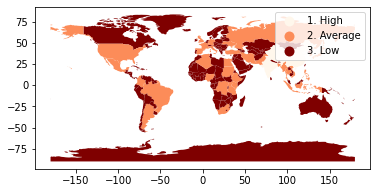

In [41]:
Map = geoJson.plot(column = 'population_class',legend = True, cmap ='OrRd')
Map